In [27]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [28]:
def get_data():
    #get train data
    train_data_path ='train.csv'
    train = pd.read_csv(train_data_path)
    
    #get test data
    seed = 7
    np.random.seed(seed)
    train, validation = train_test_split(train, test_size=0.2, random_state=seed)    
    return train,validation 

In [29]:
train , validation = get_data()
train_target = train.Servidas
train.drop(['Servidas'],axis = 1 , inplace = True)
validation_target=validation.Servidas
validation.drop(['Servidas'],axis = 1 , inplace = True)

In [30]:
# Arvores de decisao
regr_1 = DecisionTreeRegressor()

In [31]:
# Ada Boost
rng = np.random.RandomState(1)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(),
                          n_estimators=300, random_state=rng)

In [32]:
regr_1.fit(train, train_target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [33]:
regr_2.fit(train, train_target)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=<mtrand.RandomState object at 0x7fd32909d900>)

In [34]:
predict1 = regr_1.predict(validation)
print('Decision Tree Regressor MAE = ', mean_absolute_error(validation_target , predict1))
print('Decision Tree Regressor R2 = ', r2_score(validation_target , predict1))

Decision Tree Regressor MAE =  656.651162791
Decision Tree Regressor R2 =  0.829332100968


In [35]:
predict2 = regr_2.predict(validation)
print('Decision Tree Regressor MAE = ', mean_absolute_error(validation_target , predict2))
print('Decision Tree Regressor R2 = ', r2_score(validation_target , predict2))

Decision Tree Regressor MAE =  489.176744186
Decision Tree Regressor R2 =  0.906972581484


In [36]:
# Plot the results
validation_=validation.values[100:110,:]
validation_target_=validation_target.values.reshape((validation_target.shape[0],1))[100:110,:]
predict1_=predict1.reshape((predict1.shape[0],1))[100:110,:]
predict2_=predict2.reshape((predict2.shape[0],1))[100:110,:]
validation_reduced = PCA(n_components=1).fit_transform(validation_)

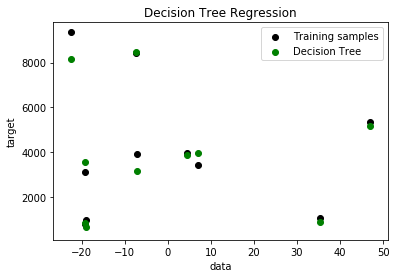

In [37]:
# A imagem mostra os dados verdadeiros em preto e em verde aqueles encontrados pela árvore de decisão
plt.figure()
plt.scatter(validation_reduced, validation_target_, c="k", label="Training samples")
plt.scatter(validation_reduced,predict1_ , c="g", label="Decision Tree")
#plt.scatter(validation_reduced, predict2_, c="r", label="n_estimators=300")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

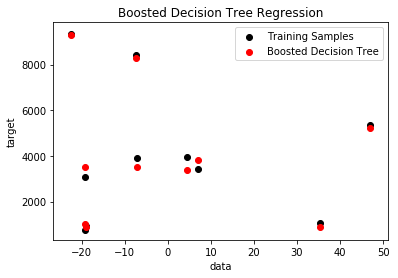

In [38]:
# A imagem mostra os dados verdadeiros em preto e em vermelho aqueles encontrados pela árvore de decisão con ada boost
plt.figure()
plt.scatter(validation_reduced, validation_target_, c="k", label="Training Samples")
#plt.scatter(validation_reduced,predict1_ , c="g", label="Decision Tree")
plt.scatter(validation_reduced, predict2_, c="r", label="Boosted Decision Tree")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

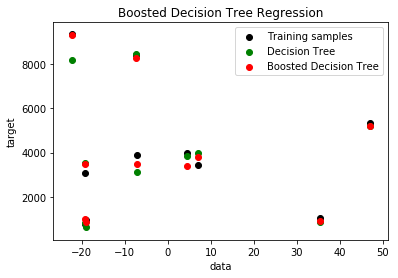

In [39]:
# A imagem mostra os dados verdadeiros em preto e em verde aqueles encontrados pela árvore de decisão e 
# em vermelho aqueles encontrados pela árvore de decisão com ada boost, se pode ver que ada boost foi melhor
plt.figure()
plt.scatter(validation_reduced, validation_target_, c="k", label="Training samples")
plt.scatter(validation_reduced,predict1_ , c="g", label="Decision Tree")
plt.scatter(validation_reduced, predict2_, c="r", label="Boosted Decision Tree")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

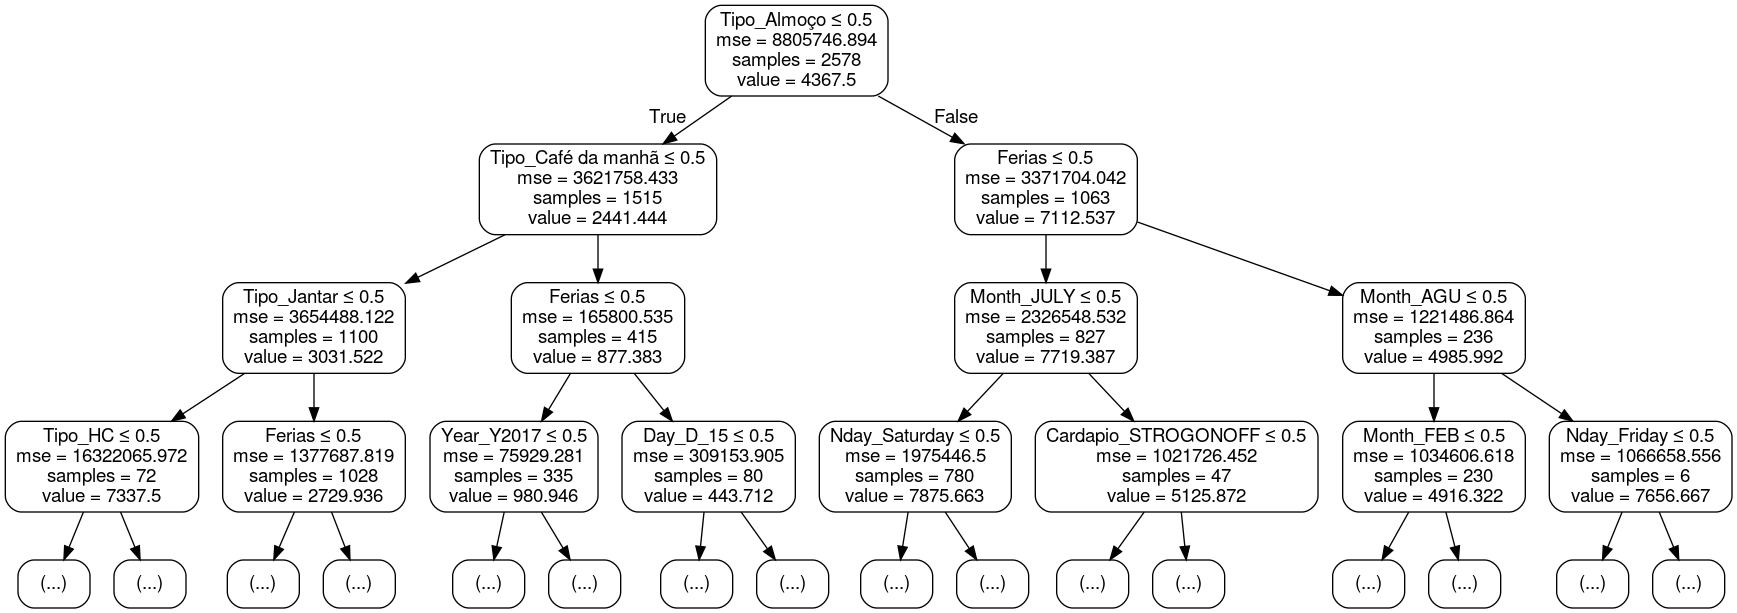

In [41]:
# Aqui está a árvore que gera, para alterar a profundidade é a variável max_depth
dot_data = StringIO()
name=list(train)
export_graphviz(regr_1, out_file=dot_data, filled=False, rounded=True, special_characters=True,max_depth=3,
                feature_names=name)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#graph.write_png('Images/tree.png')